In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import featuretools as ft

In [54]:
data = pd.read_csv('Seasons_stats.csv', skip_blank_lines=True)
data = data.drop(['blanl', 'blank2', 'Unnamed: 0'], axis=1)

data.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24624 non-null  float64
 1   Player  24624 non-null  object 
 2   Pos     24624 non-null  object 
 3   Age     24616 non-null  float64
 4   Tm      24624 non-null  object 
 5   G       24624 non-null  float64
 6   GS      18233 non-null  float64
 7   MP      24138 non-null  float64
 8   PER     24101 non-null  float64
 9   TS%     24538 non-null  float64
 10  3PAr    18839 non-null  float64
 11  FTr     24525 non-null  float64
 12  ORB%    20792 non-null  float64
 13  DRB%    20792 non-null  float64
 14  TRB%    21571 non-null  float64
 15  AST%    22555 non-null  float64
 16  STL%    20792 non-null  float64
 17  BLK%    20792 non-null  float64
 18  TOV%    19582 non-null  float64
 19  USG%    19640 non-null  float64
 20  OWS     24585 non-null  float64
 21  DWS     24585 non-null  float64
 22

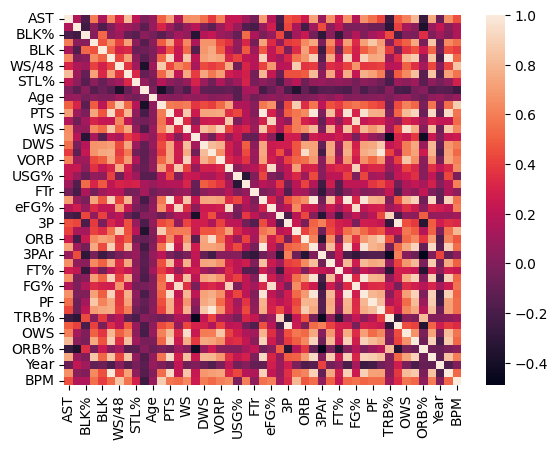

In [56]:
numerical = list(
    set(data.columns)
    - set(
        [
            "Player",
            "Pos",
            "Tm",
        ]
    )
)
corr_matrix = data[numerical].corr()
sns.heatmap(corr_matrix);

**Показує кореляцію між фічами, при побудові моделі треба її прибрати**

<Axes: xlabel='PER', ylabel='PTS'>

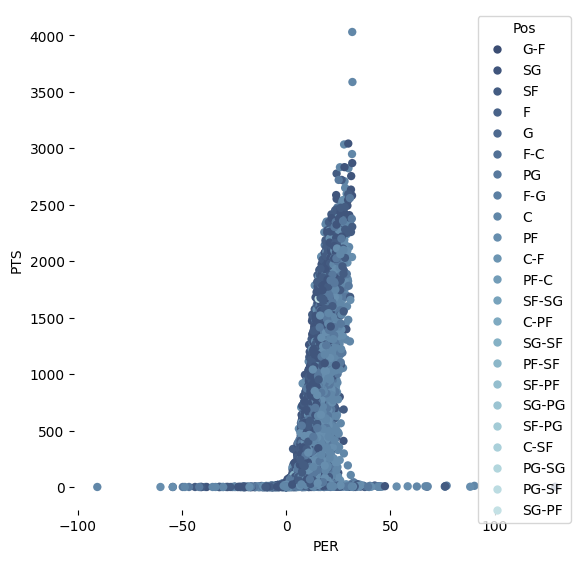

In [57]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="PER", y="PTS",
                hue="Pos",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=data, ax=ax)

**Цей графік показує зв’язок між ефективністю гравця та його здатністю забивати. Кожне очко представляє гравця, і ми можемо спостерігати, чи вищий показник PER корелює з більшою кількістю набраних очок PTS.**

<Axes: xlabel='Year', ylabel='TS%'>

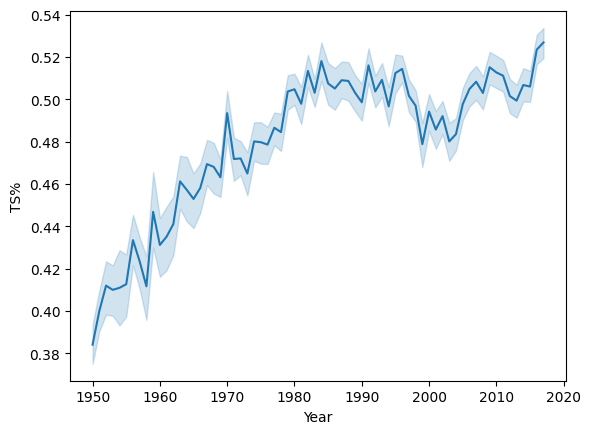

In [58]:

# Plot the responses for different events and regions
sns.lineplot(x="Year", y="TS%",
             data=data)

**Цей графік відображає тенденцію TS% у різні сезони. Це допомагає побачити, чи покращується ефективність кидка гравців з часом.**

Text(0, 0.5, 'Average Minutes Played')

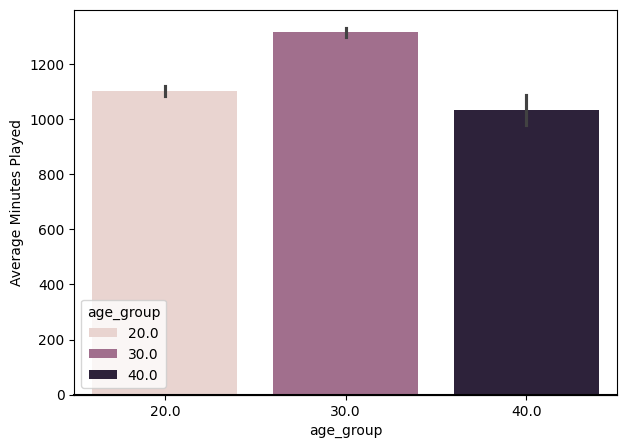

In [59]:
data['age_group'] = data["Age"] / 10
data["age_group"] = data['age_group'].round(0) * 10

f, ax1 = plt.subplots(1, 1, figsize=(7, 5), sharex=True)

sns.barplot(data=data, x='age_group', y='MP', hue='age_group', ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Average Minutes Played")


**Ця гістограма показує середню кількість хвилин, зіграних за гру різними віковими групами, показуючи, як час гри змінюється залежно від віку.**

<Axes: xlabel='USG%', ylabel='TOV%'>

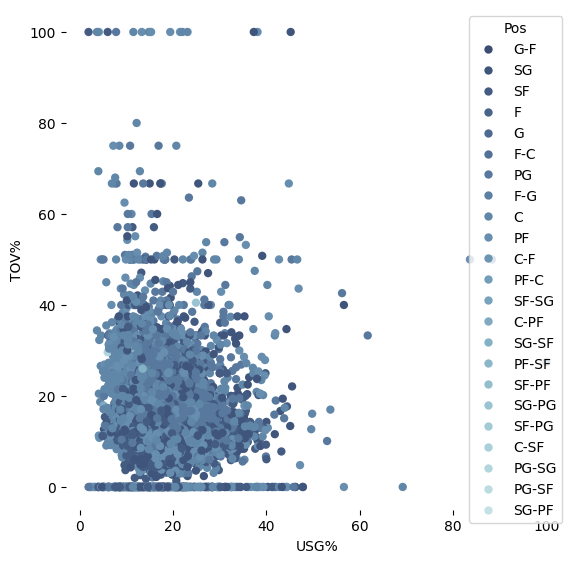

In [60]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="USG%", y="TOV%",
                hue="Pos",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=data, ax=ax)

**Цей графік ілюструє зв’язок між рівнем використання гравця та відсотком його обороту. Це допомагає визначити, чи гравці з більшим використанням більш схильні до замін.**

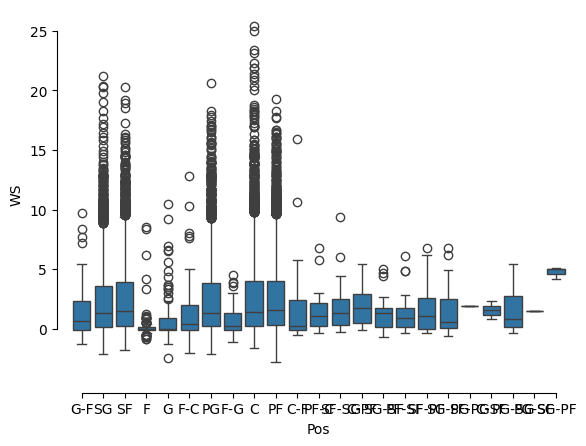

In [61]:
sns.boxplot(x="Pos", y="WS", data=data)

sns.despine(offset=10, trim=True)



**Ця коробкова діаграма порівнює розподіл Win Shares між різними позиціями. Він показує, які позиції більше сприяють перемогам команди. Та які є аутлаєри**

<Axes: xlabel='FG%', ylabel='eFG%'>

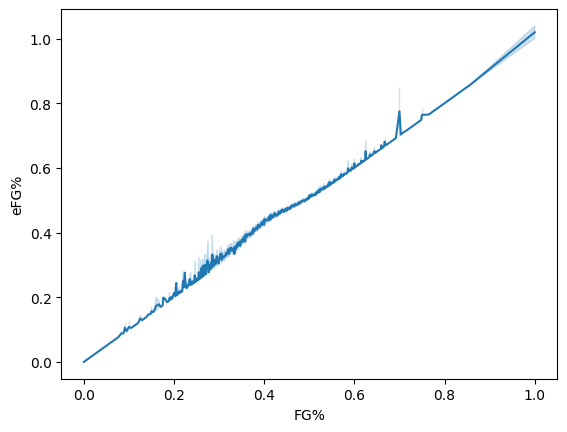

In [62]:
sns.lineplot(x="FG%", y="eFG%",
             data=data)

**Цей графік демонструє зв’язок між FG% і eFG%. Він показує порівняння ефективного відсотка кидків з гри (з урахуванням 3-очкових кидків) зі стандартним відсотком кидків з гри.**

<Axes: xlabel='PTS', ylabel='AST'>

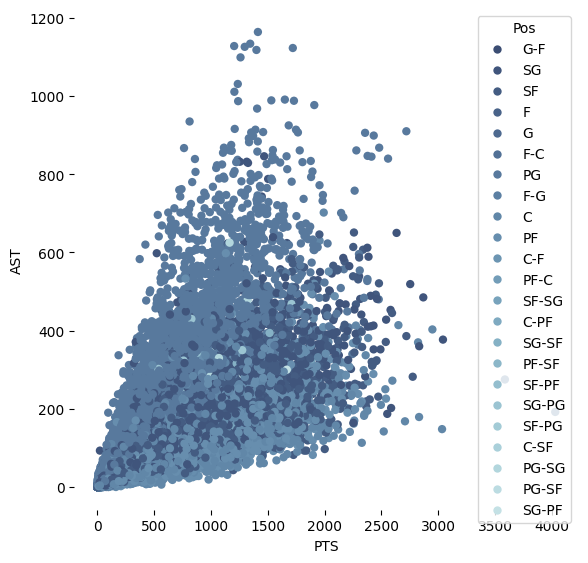

In [63]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="PTS", y="AST", hue="Pos",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=data, ax=ax)

**Цей графік показує взаємозв’язок між забиванням очок і розігруванням. Він може виділити гравців, які не тільки є найкращими бомбардирами, але й роблять значний внесок у результативні передачі.**